### K-Means Example

### Synthetic dataset
This dataset represeents the customers of a Mall who subscribed for the Mall's card. We have some information about these customers such as their age, annual income, genre, and spending score. The spending score, particularly, is a metric that explain the spending behaviour of each client. We then have the opportunity to group customers which have similar behaviours, clustering them in the same group using the K-Means algorithm.

#### Imports

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

#### Loading dataset

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Selecting variables of interest

In [8]:
X = df.iloc[:, [3,4]].values

#### What is the optimal number of clustes? We can use the Elbow Method to find out

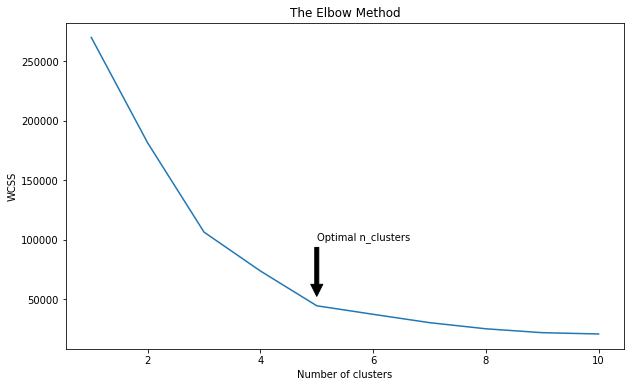

In [63]:
plt.figure(figsize=(10, 6))
wcss = []

for _ in range(1, 11):
    kmeans = KMeans(n_clusters=_, init='k-means++', max_iter=300,
                   n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.annotate(s='Optimal n_clusters', xy=(5, 50000), xytext=(5, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")

### So, we find out that 5 is the optimal number of clusters for this dataset. Let's apply these to our algorithm

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300,
               n_init=10, random_state=0)

#### Predicting the clusters

In [26]:
y_kmeans=kmeans.fit_predict(X)

#### Plotting the clusters

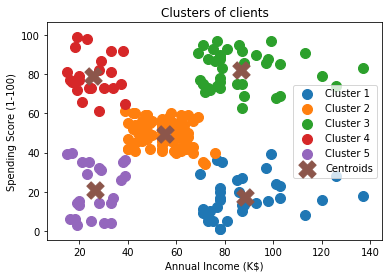

In [42]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans == 0, 1], s=100,
            label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans == 1, 1], s=100,
            label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans == 2, 1], s=100, 
            label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans == 3, 1], s=100, 
            label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans == 4, 1], s=100,  
            label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s=300, label='Centroids', marker='X')
plt.title("Clusters of clients")
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

#### Wrapping up

Cluster 3 has the customer group of individuals that have a high income, and spend a high amount of money. Therefore, could be considered a very potential target group. Perhaps knowing which kind of products they buy the most and recommend others, or improve the other groups of customers' spending score